# PYTHON IMAGE PROCESSING 

## Import Libraries

In [1]:
import PIL #pillow
#from PIL import Image # to create image object
#from PIL import ImageOps # for operations on image
#from PIL import ImageDraw , ImageFont , ImageColor # for drawing or texting on image
#from PIL import ImageFilter # for image effects
from PIL import Image , ImageOps , ImageDraw , ImageFont ,ImageColor, ImageFilter

import numpy as np
import cv2


import matplotlib.pyplot as plt

## Loading image

In [2]:
im = Image.open("Images/sibs8.jpg") #image in same folder or specify path
im.show() 

## Getting Image data

In [3]:
print(im.format)
print(im.mode) #coloured RGB or gray scaled
print(im.size)
print(im.width)
print(im.height)
print(im.info)

JPEG
RGB
(720, 1280)
720
1280
{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1), 'progressive': 1, 'progression': 1}


## Saving Image

In [4]:
#image in same folder or specify path
im.save("Images/we.png") #can save with different formats

## Image operations

In [5]:
# flip vertically
im2 = ImageOps.flip(im)
im2.show()

In [6]:
# flip horizontally
im2 = ImageOps.mirror(im)
im2.show()

In [7]:
# convert to gray scale
im2 = ImageOps.grayscale(im)
im2.show()

In [8]:
# invert image
im2 = ImageOps.invert(im)
im2.show()

## Image Transformations

In [9]:
# rotate image
im2 = im.rotate(90)# defulat left ,for right use negative angles
im2.show()

In [10]:
# resize image
im2 = im.resize((700,500))
im2.show()

## Add text to Image

In [11]:
# #need to reopen to undo changes in im2 for next execution 
# im2 = Image.open("Images/sibs8.jpg")

# d2 = ImageDraw.Draw(im2)
# myFont = ImageFont.truetype("Fonts/Blenda Script.otf",80)#load font,size
# d2.text((20,20) , "Reddaa" ,font = myFont, fill = (255,0,0))#pos,txt,font,color
# d2.text((400,20) , "Mhaishuu" ,font = myFont, fill = (0,0,0))
# im2.show()

## Crop and Paste

In [12]:
#crop
box = (0,100 ,600,900) #(x1,y1 ,x2,y2)
cropimg = im.crop(box)
cropimg.show()

In [13]:
# paste one image on another
im = Image.open("Images/sibs8.jpg")
im.paste(cropimg , (80,0))
im.paste(cropimg , (80,600))
im.show()

## Kernels

In [14]:
##Two smoothing (averaging) filter masks
smooth1 = np.array(( 
            (1,1,1),
            (1,1,1),
            (1,1,1),
            )) /9

smooth2 = np.array((
            (1,2,1),
            (2,4,2),
            (1,2,1),
            )) /16


laplacian_edge = np.array((
            (-1,-1,-1),
            (-1,8,-1),
            (-1,-1,-1),
            ))


##Using the Second Derivative for Image Sharpening—The Laplacian

laplacian_sharp1 = np.array((
            (0,1,0),
            (1,-4,1),
            (0,1,0),
            ))

laplacian_sharp2 = np.array((
            (0,-1,0),
            (-1,4,-1),
            (0,-1,0),
            ))

laplacian_sharp3 = np.array((
            (1,1,1),
            (1,-8,1),
            (1,1,1),
            ))

laplacian_sharp4 = np.array((
            (-1,-1,-1),
            (-1,8,-1),
            (-1,-1,-1),
            ))

# Roberts Cross gradient masks

cross_grad1 = np.array((
            (-1 ,  0),
            (0 ,  1),
            ))

cross_grad2 = np.array((
            (0 ,  -1),
            (1 ,  0),
            ))


sobel_gx = np.array((
            (-1,-2,-1),
            (0,0,0),
            (1,2,1),
            ))

sobel_gy = np.array((
            (-1,0,1),
            (-2,0,2),
            (-1,0,1),
            ))

## Image Effects

In [15]:
im = Image.open("Images/sibs8.jpg")
blurimg = im.filter(ImageFilter.BLUR)#press tab after ImageFilter.
blurimg.show()

In [16]:
blurimg = im.filter(ImageFilter.GaussianBlur(2))
blurimg.show()

In [17]:
#radius – Size of the box in one direction. Radius 0 does not blur, returns an identical image. 
#Radius 1 takes 1 pixel in each direction, i.e. 9 pixels in total.

boxblurimg = im.filter(ImageFilter.BoxBlur(0))
boxblurimg.show()

In [18]:
enhcimg = im.filter(ImageFilter.EDGE_ENHANCE)
enhcimg.show()

In [19]:
embsimg = im.filter(ImageFilter.EMBOSS)
embsimg.show()

In [20]:
cntrimg = im.filter(ImageFilter.CONTOUR)
cntrimg.show()

In [21]:
sharpimg = im.filter(ImageFilter.SHARPEN)
sharpimg.show()

In [22]:
smthimg = im.filter(ImageFilter.SMOOTH)
smthimg.show()

In [23]:
im2 = ImageOps.grayscale(im)
im2.show()
#im2 = im.convert('L')

In [24]:
maximg = im2.filter(ImageFilter.MaxFilter(3)) # makes image light # 3 is kernel size i.e. 3x3
maximg.show()

In [25]:
minimg = im2.filter(ImageFilter.MinFilter(3)) # makes image dark
minimg.show()

In [26]:
medimg = im2.filter(ImageFilter.MedianFilter(3)) # makes image dark
medimg.show()

In [27]:
thresh = 100
fn = lambda x : 255 if x > thresh else 0
im3 = im2.convert('L').point(fn, mode='L')
im3.show()

## Create Image

In [28]:
img = Image.new("RGB" , (500,500) , ImageColor.getrgb("cyan")) 
#cyan image or use colour codes hexadecimal or rgb value
img.show()

In [29]:
img = Image.new("RGB" , (500,500) , ImageColor.getrgb("cyan")) 
draw = ImageDraw.Draw(img)
#draw line
draw.line([(0,0) , (200,200)],fill = "red" , width= 5)
#draw circle
draw.ellipse((50,100 ,150,200) ,fill = "green" , outline = "black" )
#draw rectangle
draw.rectangle((300,100 ,450,200) ,fill = "blue" , outline = "black" )
img.show()

## Pixels on Image

In [30]:
img = Image.new("RGB" , (500,500) , ImageColor.getrgb("cyan")) 
width , height = img.size

for x in range(height):
    img.putpixel((x,x) ,(0,0,0,255)) #position , color
    img.putpixel((x,-x) ,(0,0,0,255))
    img.putpixel((x,100) ,(0,0,0,255))

img.show()

## Creating Image with array

In [31]:
imgarr = np.array((
        (10, 12, 10, 11, 12),
        (11,200, 201, 200, 202),
        (11, 200, 11, 12, 10),
        (10, 201, 10, 11, 11),
        (10, 200, 11, 12, 10),
      ))

print(imgarr)

img=Image.fromarray(imgarr)
#img=ImageOps.grayscale(img)
img = img.convert('L')
#img.show()
print("\n\n" , np.asarray(img))
print("\n\n" ,img.mode)

[[ 10  12  10  11  12]
 [ 11 200 201 200 202]
 [ 11 200  11  12  10]
 [ 10 201  10  11  11]
 [ 10 200  11  12  10]]


 [[ 10  12  10  11  12]
 [ 11 200 201 200 202]
 [ 11 200  11  12  10]
 [ 10 201  10  11  11]
 [ 10 200  11  12  10]]


 L


## Chapter 2 - Basic Fundamentals

## Applying Some Filters

In [32]:

maximg = img.filter(ImageFilter.MaxFilter(3))
print("\n\n" , np.asarray(maximg))

minimg = img.filter(ImageFilter.MinFilter(3))
print("\n\n" , np.asarray(minimg))

medimg = img.filter(ImageFilter.MedianFilter(3))
print("\n\n" , np.asarray(medimg))



 [[200 201 201 202 202]
 [200 201 201 202 202]
 [201 201 201 202 202]
 [201 201 201  12  12]
 [201 201 201  12  12]]


 [[10 10 10 10 11]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]


 [[ 11  11  12  12  12]
 [ 11  11  12  12  12]
 [ 11  11 200  11  11]
 [ 11  11  12  11  11]
 [ 10  11  12  11  11]]


In [33]:
print("\n\n" , np.asarray(img))

# Binary Image
thresh = 128
fn = lambda x : 255 if x > thresh else 0  # lambda arguments : expression
im3 = img.convert('L').point(fn, mode='L')#mode = 1 for T/F 
print("\n\n" , np.asarray(im3))



 [[ 10  12  10  11  12]
 [ 11 200 201 200 202]
 [ 11 200  11  12  10]
 [ 10 201  10  11  11]
 [ 10 200  11  12  10]]


 [[  0   0   0   0   0]
 [  0 255 255 255 255]
 [  0 255   0   0   0]
 [  0 255   0   0   0]
 [  0 255   0   0   0]]


In [34]:
thresh = 120
im4 = img.point(lambda p: p > thresh and 255)
print("\n\n" , np.asarray(im4))



 [[  0   0   0   0   0]
 [  0 255 255 255 255]
 [  0 255   0   0   0]
 [  0 255   0   0   0]
 [  0 255   0   0   0]]


In [35]:
print(1 and 255)
print(0 and 255)
print(123 and 2554)
print(1234 and 255)
print(1 or 255)
print(0 or 12)


255
0
2554
255
1
12


In [36]:
# complement of an image
print("\n\n" , 255 - np.asarray(img))



 [[245 243 245 244 243]
 [244  55  54  55  53]
 [244  55 244 243 245]
 [245  54 245 244 244]
 [245  55 244 243 245]]


## Union of Images

In [37]:
## Union of 2 same size images (max of pixels)

imgarr1 = np.array((
        (10, 12, 10, 11, 12),
        (11,200, 201, 200, 202),
        (11, 200, 11, 12, 10),
        (10, 201, 10, 11, 11),
        (10, 200, 11, 12, 10),
      ))



img1=Image.fromarray(imgarr1)
img1=ImageOps.grayscale(img1)
#img.show()
print("\n\n" , np.asarray(img1))

imgarr2 = np.array((
        (13, 1, 1, 110, 129),
        (116,2, 2, 209, 207),
        (199, 20, 118, 1, 0),
        (109, 201, 18, 11, 11),
        (10, 200, 11, 12, 10),
      ))



img2=Image.fromarray(imgarr2)
img2=ImageOps.grayscale(img2)
#img.show()
print("\n\n" , np.asarray(img2))



def Image_union(pil_img1 , pil_img2):
    arr1 = np.asarray(img1)
    arr2 = np.asarray(img2)
    
    width, height = pil_img1.size
    Resultarr = np.zeros((width,height),dtype=int)
    
    for i in range(0,width):
        for j in range(0,height):
             Resultarr[i][j] = max(arr1[i][j] ,arr2[i][j])
    
    
    Result=Image.fromarray(Resultarr)
    return Result
    

Unionimg = Image_union(img1 , img2) #pass 2 images 
print("\n\n" , np.asarray(Unionimg))



 [[ 10  12  10  11  12]
 [ 11 200 201 200 202]
 [ 11 200  11  12  10]
 [ 10 201  10  11  11]
 [ 10 200  11  12  10]]


 [[ 13   1   1 110 129]
 [116   2   2 209 207]
 [199  20 118   1   0]
 [109 201  18  11  11]
 [ 10 200  11  12  10]]


 [[ 13  12  10 110 129]
 [116 200 201 209 207]
 [199 200 118  12  10]
 [109 201  18  11  11]
 [ 10 200  11  12  10]]


## Chapter 3 - Intensity Transformations 

In [38]:
imgarr = np.array((
        (10, 12, 10, 11, 12),
        (11,200, 201, 200, 202),
        (11, 200, 11, 12, 10),
        (10, 201, 10, 11, 11),
        (10, 200, 11, 12, 10),
      ))


img=Image.fromarray(imgarr)
#img=ImageOps.grayscale(img)
img = img.convert('L')
#img.show()
print("\n\n" , np.asarray(img))



 [[ 10  12  10  11  12]
 [ 11 200 201 200 202]
 [ 11 200  11  12  10]
 [ 10 201  10  11  11]
 [ 10 200  11  12  10]]


In [39]:
# image negatives
# complement of an image

print("\n\n" , 255 - np.asarray(img))


img2 = img.point(lambda p: 255-p)

print("\n\n" , np.asarray(img2))



 [[245 243 245 244 243]
 [244  55  54  55  53]
 [244  55 244 243 245]
 [245  54 245 244 244]
 [245  55 244 243 245]]


 [[245 243 245 244 243]
 [244  55  54  55  53]
 [244  55 244 243 245]
 [245  54 245 244 244]
 [245  55 244 243 245]]


### When logarithmic transformation is applied onto a digital image, 
### the darker intensity values are given brighter values 
### thus making the details present in darker or gray areas of the image more visible to human eyes.
### The logarithmic transformation also scales down the brighter intensity values to lower values.
### However, the brighter intensity values are not scaled down to the extent the darker intensity values are scaled up.
### ‘c’ is the scaling constant.
### For a digital image with intensity values ranging from 0 to 255 
### the transformation log(r+1) produces value in the range of 0 to 2.41.
### Representing pixel values in a smaller range of values from 0 to 2.41 is difficult to comprehend.
### Hence, a scaling operation is required to represent the logarithmically transformed intensity values in a bigger range.
### The scaling constant ‘c’ does this.
### The scaling constant is provided by
### c = 255/log(1+Maximum pixel value from the input image).

In [41]:
# Compute log
import math

def logTransform(c, f):

    g = c * math.log(float(1 + f),10);

    return g;

 

# Apply logarithmic transformation for an image  

def logTransformImage(img):

    image = img.copy() #making copy of an image to apply transformations
    
    inputMax=np.asarray(img).max()

    c = 255/math.log(inputMax+1,10);
   

    # Read pixels and apply logarithmic transformation

    for i in range(0, image.size[0]):

        for j in range(0, image.size[1]):

            # Get pixel value at (x,y) position of the image

            f = image.getpixel((i,j));

           

            # Do log transformation of the pixel
            if image.mode == 'L':
                pixel = round(logTransform(c, f));
                
            else:
                
                redPixel    = round(logTransform(c, f[0]));

                greenPixel  = round(logTransform(c, f[1]));

                bluePixel   = round(logTransform(c, f[2]));

 

            # Modify the image with the transformed pixel values
            if (image.mode) == 'L':
                
                image.putpixel((i,j),pixel);
            
            else:
                             
                  image.putpixel((i,j),(redPixel, greenPixel, bluePixel));

 

    return image;

   

# importing image

# imageFileName = "Images/sibs8.jpg";

# img = Image.open(imageFileName);

# img.show();

 

# Display the image after applying the logarithmic transformation

print("\n\n" , np.asarray(img))

logTransformedImage = logTransformImage(img); 

print("\n\n" ,np.asarray(logTransformedImage) )
print("\n\n" , np.asarray(img))
#logTransformedImage.show();



 [[ 10  12  10  11  12]
 [ 11 200 201 200 202]
 [ 11 200  11  12  10]
 [ 10 201  10  11  11]
 [ 10 200  11  12  10]]


 [[115 123 115 119 123]
 [119 255 255 255 255]
 [119 255 119 123 115]
 [115 255 115 119 119]
 [115 255 119 123 115]]


 [[ 10  12  10  11  12]
 [ 11 200 201 200 202]
 [ 11 200  11  12  10]
 [ 10 201  10  11  11]
 [ 10 200  11  12  10]]


In [44]:
def logTransformImg(image):
    
    img = image.copy()
    c = 255/(np.log(1 + np.max(img))) 
    log_transformed = np.round(c * np.log(1 + np.array(img))) #log_transformed is only array 
    return Image.fromarray(np.array(log_transformed, int)) # converting to int and image
 


logimg = logTransformImg(img) # 

print(logimg.mode)

print("\n\n" ,np.array(logimg) )
print("\n\n" , np.array(img))

I


 [[115 123 115 119 123]
 [119 255 255 255 255]
 [119 255 119 123 115]
 [115 255 115 119 119]
 [115 255 119 123 115]]


 [[ 10  12  10  11  12]
 [ 11 200 201 200 202]
 [ 11 200  11  12  10]
 [ 10 201  10  11  11]
 [ 10 200  11  12  10]]


## As can be observed from the outputs gamma>1 , the intensity of pixels decreases i.e. the image becomes darker. 
## On the other hand, gamma<1 the intensity increases i.e. the image becomes lighter.

In [45]:
# apply power law gamma transformation
print("\n\n" , np.array(img))
# Trying 4 gamma values. 
for gamma in [0.1, 0.5, 1.2, 2.2]: 
      
    # Apply gamma correction. 
    #c = 255/(np.log(1 + np.max(img))) # assume c = 1
    c = 1
    gamma_corrected =  c*255*(np.array(img) / 255) ** gamma # adjustment for intensities

    gamma_corrected = Image.fromarray(np.array(gamma_corrected, int))
    
    print('\n\ngamma_transformed'+str(gamma),"\n\n", np.array(gamma_corrected))
    



 [[ 10  12  10  11  12]
 [ 11 200 201 200 202]
 [ 11 200  11  12  10]
 [ 10 201  10  11  11]
 [ 10 200  11  12  10]]


gamma_transformed0.1 

 [[184 187 184 186 187]
 [186 248 249 248 249]
 [186 248 186 187 184]
 [184 249 184 186 186]
 [184 248 186 187 184]]


gamma_transformed0.5 

 [[ 50  55  50  52  55]
 [ 52 225 226 225 226]
 [ 52 225  52  55  50]
 [ 50 226  50  52  52]
 [ 50 225  52  55  50]]


gamma_transformed1.2 

 [[  5   6   5   5   6]
 [  5 190 191 190 192]
 [  5 190   5   6   5]
 [  5 191   5   5   5]
 [  5 190   5   6   5]]


gamma_transformed2.2 

 [[  0   0   0   0   0]
 [  0 149 151 149 152]
 [  0 149   0   0   0]
 [  0 151   0   0   0]
 [  0 149   0   0   0]]


In [46]:
def gamma_corrected(image ,gamma ,c = 1):
    
    gamma_corrected =  c*255*(np.array(img) / 255) ** gamma # adjustment for intensities
    return gamma_corrected = Image.fromarray(np.array(gamma_corrected, int))


SyntaxError: invalid syntax (<ipython-input-46-14fb2a651d4c>, line 4)

## Piecewise-Linear Transformation 
## Contrast =  (I_max - I_min)/(I_max + I_min)

In [ ]:

print("\n\n" , np.array(img))




def pixelVal(pix, r1, s1, r2, s2): 
    if ( pix >= 0 and pix <= r1):    
        return (s1 / r1)*pix 
    elif ( pix > r1 and pix <= r2):  
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else:                            
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
  
 
  
#Define parameters. 
r1 = 70
s1 = 40
r2 = 140
s2 = 205

# pixel in 0 to r1 will map to 0  to s1
# pixel in r1 to r2 will map to s1  to s2
# pixel in r2 to 255 will map to s2  to 255

# Vectorize the function to apply it to each value in the Numpy array i.e to each pixel with same r1,s1,r2,s2 values each time. 
pixelVal_vec = np.vectorize(pixelVal) 
  
# Apply contrast stretching. 
contrast_stretched = Image.fromarray(np.array(pixelVal_vec(img, r1, s1, r2, s2),int)) 

print("\n\n" , np.array(contrast_stretched , int))

In [47]:
## Intensity Slicing

print("\n\n" , np.array(img))


def intensity_slice(pix, min_range ,max_range ,new): 
    if ( pix >= min_range and pix <= max_range):
        return new
    else:
        return pix

  
#Define parameters. 
min_range =5
max_range = 15
new_intensity = 0

# pixel in min to max will map to new 


# Vectorize the function to apply it to each value in the Numpy array i.e to each pixel with same r1,s1,r2,s2 values each time. 
intensity_slice_vec = np.vectorize(intensity_slice) 
  
# Apply intensity slicing. 

intensity_sliced = Image.fromarray(np.array(intensity_slice_vec(img, min_range,max_range , new_intensity)))


print("\n\n" , np.array(intensity_sliced))



 [[ 10  12  10  11  12]
 [ 11 200 201 200 202]
 [ 11 200  11  12  10]
 [ 10 201  10  11  11]
 [ 10 200  11  12  10]]


 [[  0   0   0   0   0]
 [  0 200 201 200 202]
 [  0 200   0   0   0]
 [  0 201   0   0   0]
 [  0 200   0   0   0]]


In [48]:
## Bit plane slicing

print("\n\n" , np.array(img))

#bitsimage = np.array((np.array(img).tobytes()))

import io

def image_to_byte_array(image:Image):
  imgByteArr = io.BytesIO()
  image.save(imgByteArr , "PNG")
  imgByteArr = imgByteArr.getvalue()
  return imgByteArr

bitsimage = np.array(image_to_byte_array(img))

print("\n\n" ,np.array(bitsimage))







 [[ 10  12  10  11  12]
 [ 11 200 201 200 202]
 [ 11 200  11  12  10]
 [ 10 201  10  11  11]
 [ 10 200  11  12  10]]


 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x05\x00\x00\x00\x05\x08\x00\x00\x00\x00\xa8\x04y9\x00\x00\x00$IDATx\x9c\x05\xc1\xb1\x11\x000\x0c\x021\x9e\xa3\xcaX\x9e\xdb\xb3\x99H<\x1f\x84\xa5\x8e4\\J\x85U\xe8\x07k\xac\x08\x1cj8A$\x00\x00\x00\x00IEND\xaeB`\x82'


## Histogram Processing

In [49]:
img2arr = np.array((
        (10, 20, 25, 15, 15 ,14 ,12),
        (12, 14, 150, 175, 170 , 13 , 20),
        (10, 12, 172, 189, 175 , 20 , 14),
        (14, 180, 185, 172, 180 , 14 ,15),
        (14, 180, 175, 173, 180 , 185 ,10),
        (12, 9, 181, 180, 154 , 150 , 10),
        (13, 10, 11, 12, 14 , 12 ,11),
        
      ))

print(img2arr)

img2=Image.fromarray(img2arr)
#img=ImageOps.grayscale(img)
img2 = img2.convert('L')
#img.show()
print("\n\n" , np.asarray(img2))


[[ 10  20  25  15  15  14  12]
 [ 12  14 150 175 170  13  20]
 [ 10  12 172 189 175  20  14]
 [ 14 180 185 172 180  14  15]
 [ 14 180 175 173 180 185  10]
 [ 12   9 181 180 154 150  10]
 [ 13  10  11  12  14  12  11]]


 [[ 10  20  25  15  15  14  12]
 [ 12  14 150 175 170  13  20]
 [ 10  12 172 189 175  20  14]
 [ 14 180 185 172 180  14  15]
 [ 14 180 175 173 180 185  10]
 [ 12   9 181 180 154 150  10]
 [ 13  10  11  12  14  12  11]]




 [[ 10  20  25  15  15  14  12]
 [ 12  14 150 175 170  13  20]
 [ 10  12 172 189 175  20  14]
 [ 14 180 185 172 180  14  15]
 [ 14 180 175 173 180 185  10]
 [ 12   9 181 180 154 150  10]
 [ 13  10  11  12  14  12  11]]


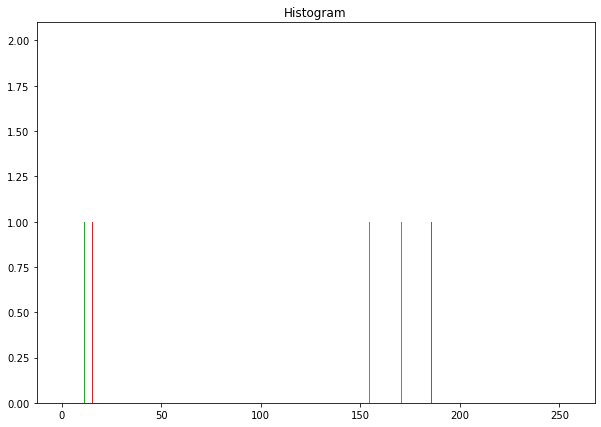

In [50]:
print("\n\n" , np.array(img2))

fig = plt.figure(figsize =(10, 7)) 

plt.hist(np.array(img2),bins = np.arange(256))  
  
plt.title("Histogram")  
  
# show plot 
plt.show() 

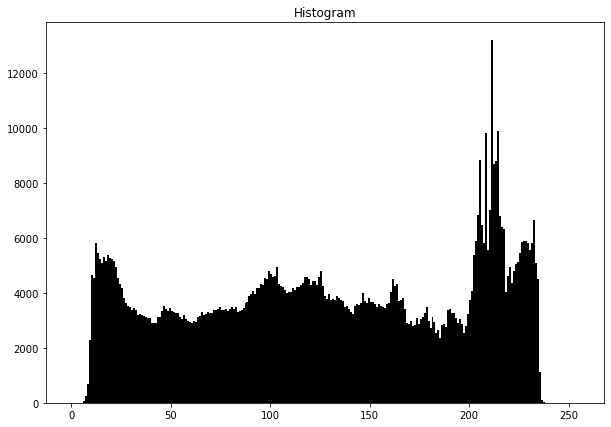

In [51]:
img3 = Image.open("Images/sibs8.jpg").convert('L')



#img3.show()

fig = plt.figure(figsize =(10, 7)) 

plt.hist(np.array(img3).flatten(),bins = range(256) , color = "black")  
  
plt.title("Histogram")  
  
# show plot 
plt.show() 




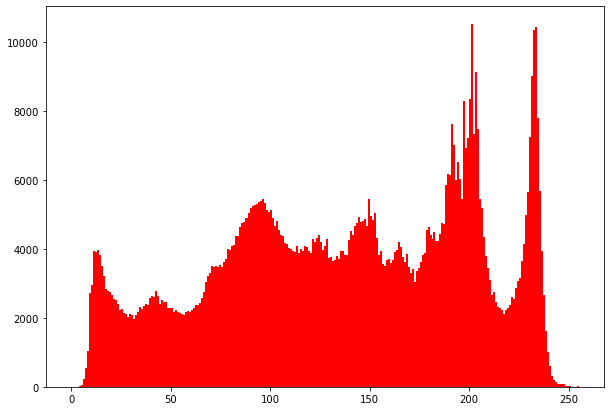

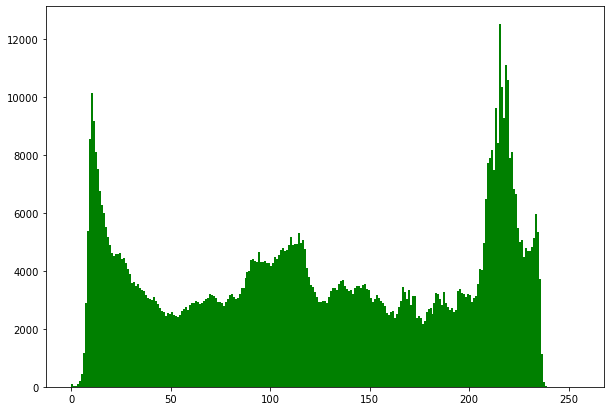

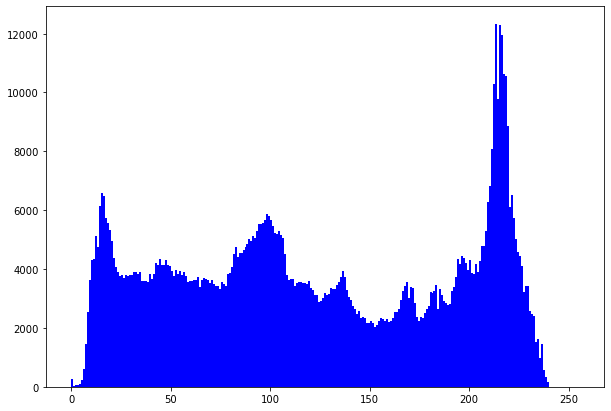

In [52]:



img4 = Image.open("Images/sibs8.jpg")
r, g, b = img4.split() 

#print(np.array(r))

fig = plt.figure(figsize =(10, 7)) 
plt.hist(np.array(r).flatten() , color = "red",bins = range(256) )
plt.show()

fig = plt.figure(figsize =(10, 7)) 
plt.hist(np.array(g).flatten() ,color = "green" ,bins = range(256)  )  
plt.show()

fig = plt.figure(figsize =(10, 7)) 
plt.hist(np.array(b).flatten() ,color = "blue" ,bins = range(256) )  
plt.show()
 
  



In [53]:
img2arr = np.array((
        (10, 20, 25, 15, 15 ,14 ,12),
        (12, 14, 150, 175, 170 , 13 , 20),
        (10, 12, 172, 189, 175 , 20 , 14),
        (14, 180, 185, 172, 180 , 14 ,15),
        (14, 180, 175, 173, 180 , 185 ,10),
        (12, 9, 181, 180, 154 , 150 , 10),
        (13, 10, 11, 12, 14 , 12 ,11),
        
      ))

print(img2arr)

img2=Image.fromarray(img2arr)
#img=ImageOps.grayscale(img)
img2 = img2.convert('L')
#img.show()
print("\n\n" , np.asarray(img2))


[[ 10  20  25  15  15  14  12]
 [ 12  14 150 175 170  13  20]
 [ 10  12 172 189 175  20  14]
 [ 14 180 185 172 180  14  15]
 [ 14 180 175 173 180 185  10]
 [ 12   9 181 180 154 150  10]
 [ 13  10  11  12  14  12  11]]


 [[ 10  20  25  15  15  14  12]
 [ 12  14 150 175 170  13  20]
 [ 10  12 172 189 175  20  14]
 [ 14 180 185 172 180  14  15]
 [ 14 180 175 173 180 185  10]
 [ 12   9 181 180 154 150  10]
 [ 13  10  11  12  14  12  11]]


## Histogram Equalization

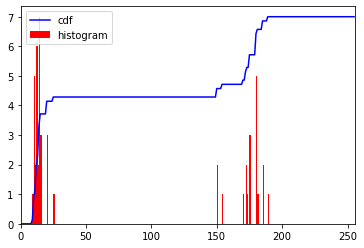



 [[ 10  20  25  15  15  14  12]
 [ 12  14 150 175 170  13  20]
 [ 10  12 172 189 175  20  14]
 [ 14 180 185 172 180  14  15]
 [ 14 180 175 173 180 185  10]
 [ 12   9 181 180 154 150  10]
 [ 13  10  11  12  14  12  11]]


In [54]:
hist,bins = np.histogram(np.array(img2).flatten(),bins = 256,range = [0,256]) #returns array of intensities and no of bins

cdf = hist.cumsum() # cumulative sum
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(np.array(img2).flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
print("\n\n" , np.array(img2))

In [55]:
img2.save("Images/img2.jpg")

## opencv code for Image Equalization

In [56]:


import cv2

img2 = cv2.imread('Images/img2.jpg',0)
img20 = img2.copy()
equ = cv2.equalizeHist(img20)
#res = np.hstack((img2,equ)) #stacking images side-by-side
cv2.imwrite('Images/img21.png',equ)

img3 = Image.open("Images/img21.png")
print(np.array(img2))
print("\n\n",np.array(img3))


[[  8  23  14  23  12  14  20]
 [  7  25 166 155 181  14   6]
 [ 17   8 171 190 168  23   5]
 [  4 169 188 165 197  19  21]
 [ 39 173 167 180 175 178   8]
 [  4   3 187 181 146 155  18]
 [ 15  24   0  24  20  14   0]]


 [[ 49 130  76 130  54  76 109]
 [ 33 146 179 168 233  76  27]
 [ 87  49 201 250 190 130  22]
 [ 16 195 244 174 255  98 114]
 [152 206 184 222 212 217  49]
 [ 16   5 239 233 157 168  92]
 [ 81 141   0 141 109  76   0]]


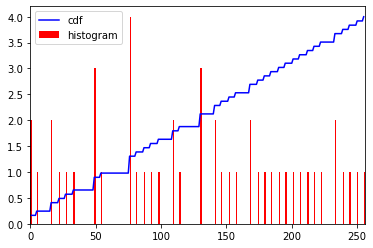

In [57]:
hist,bins = np.histogram(np.array(img3).flatten(),bins = 256,range = [0,256]) #returns array of intensities and no of bins

cdf = hist.cumsum() # cumulative sum
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(np.array(img3).flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

##  In this, image is divided into small blocks called “tiles” (tileSize is 8x8 by default in OpenCV). 
## Then each of these blocks are histogram equalized as usual. 

In [58]:
# CLAHE (Contrast Limited Adaptive Histogram Equalization)

img4 = cv2.imread('Images/img2.jpg',0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img4)

cv2.imwrite('Images/clahe.jpg',cl1)

True

[[  8  23  14  23  12  14  20]
 [  7  25 166 155 181  14   6]
 [ 17   8 171 190 168  23   5]
 [  4 169 188 165 197  19  21]
 [ 39 173 167 180 175 178   8]
 [  4   3 187 181 146 155  18]
 [ 15  24   0  24  20  14   0]]


 [[254 255 125 255 130 254 254]
 [127 250 255 189 253 193  64]
 [255 127 255 255 126 128  62]
 [127 252 255  67 254  65 191]
 [255 255  65 186 131 190  64]
 [126  64 253 196  62 130 127]
 [255 255  63 126  64  63  63]]


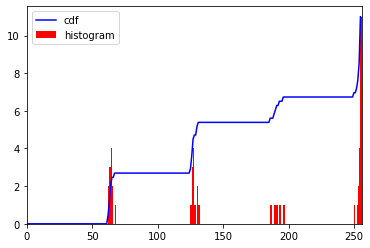

In [59]:
img4 = Image.open("Images/clahe.jpg")
print(np.array(img2))
print("\n\n",np.array(img4))

hist,bins = np.histogram(np.array(img4).flatten(),bins = 256,range = [0,256]) #returns array of intensities and no of bins

cdf = hist.cumsum() # cumulative sum
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(np.array(img4).flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [60]:

# we are taking only one feature into our consideration, ie grayscale intensity value of the pixel.
# But in two-dimensional histograms, you consider two features. 
#Normally it is used for finding color histograms where two features are Hue & Saturation values of every pixel.

#channels = [0,1] because we need to process both H and S plane.
#bins = [180,256] 180 for H plane and 256 for S plane.
#range = [0,180,0,256] Hue value lies between 0 and 180 & Saturation lies between 0 and 256.

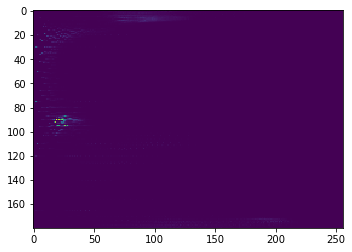

In [61]:
img5 = cv2.imread('Images/sibs8.jpg')
hsv = cv2.cvtColor(img5,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

plt.imshow(hist,interpolation = 'nearest')
plt.show()

## Correlation and Convolution

[[ 10  20  25  15  15  14  12]
 [ 12  14 150 175 170  13  20]
 [ 10  12 172 189 175  20  14]
 [ 14 180 185 172 180  14  15]
 [ 14 180 175 173 180 185  10]
 [ 12   9 181 180 154 150  10]
 [ 13  10  11  12  14  12  11]]


 [[ 10  20  25  15  15  14  12]
 [ 12  14 150 175 170  13  20]
 [ 10  12 172 189 175  20  14]
 [ 14 180 185 172 180  14  15]
 [ 14 180 175 173 180 185  10]
 [ 12   9 181 180 154 150  10]
 [ 13  10  11  12  14  12  11]]


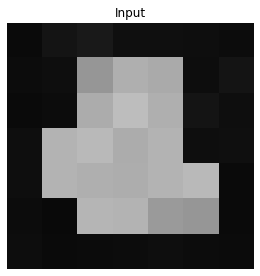

In [62]:
img2arr = np.array((
        (10, 20, 25, 15, 15 ,14 ,12),
        (12, 14, 150, 175, 170 , 13 , 20),
        (10, 12, 172, 189, 175 , 20 , 14),
        (14, 180, 185, 172, 180 , 14 ,15),
        (14, 180, 175, 173, 180 , 185 ,10),
        (12, 9, 181, 180, 154 , 150 , 10),
        (13, 10, 11, 12, 14 , 12 ,11),
        
      ))

print(img2arr)

img2=Image.fromarray(img2arr)
#img=ImageOps.grayscale(img)
img2 = img2.convert('L')
#img.show()
print("\n\n" , np.asarray(img2))

fig = plt.figure(figsize=(15,15))
a = fig.add_subplot(1, 3, 1) # 1x3 frame 1st box
a.set_title('Input')
plt.axis("off")
imgplot1 = plt.imshow(img2 , cmap='gray', vmin=0, vmax=255)

## Add and Remove Padding to Image

In [63]:
#padding

def add_margin(pil_img, top, right, bottom, left, color): 
    
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

#anti_padding

def del_margin(pil_img, top, right, bottom, left,color):
    
    width, height = pil_img.size
    new_width = width - right - left
    new_height = height - top - bottom
    result = Image.new(pil_img.mode, (new_width, new_height),color)
    result.paste(pil_img, (-top, -left))
    return result



In [64]:
img_new = add_margin(img2, 1, 1, 1, 1, 0)
print("\n\n" , np.asarray(img_new))

img_new2 = del_margin(img_new, 1, 1, 1, 1 ,0)
print("\n\n" , np.asarray(img_new2))



 [[  0   0   0   0   0   0   0   0   0]
 [  0  10  20  25  15  15  14  12   0]
 [  0  12  14 150 175 170  13  20   0]
 [  0  10  12 172 189 175  20  14   0]
 [  0  14 180 185 172 180  14  15   0]
 [  0  14 180 175 173 180 185  10   0]
 [  0  12   9 181 180 154 150  10   0]
 [  0  13  10  11  12  14  12  11   0]
 [  0   0   0   0   0   0   0   0   0]]


 [[ 10  20  25  15  15  14  12]
 [ 12  14 150 175 170  13  20]
 [ 10  12 172 189 175  20  14]
 [ 14 180 185 172 180  14  15]
 [ 14 180 175 173 180 185  10]
 [ 12   9 181 180 154 150  10]
 [ 13  10  11  12  14  12  11]]


In [66]:
# Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES 




print("Original Image")
print("\n\n" , np.asarray(img2))

print("\n\nImage Laplacian Filter Without Padding")
image = img2.filter(ImageFilter.FIND_EDGES) 
print("\n\n" , np.asarray(image))

print("\n\nImage applying Padding")
image = add_margin(img2, 2, 2, 2, 2, 0)
print("\n\n" , np.asarray(image))

print("\n\nImage Laplacian Filter With Padding")
image = image.filter(ImageFilter.Kernel((3, 3), laplacian_edge.flatten(), 1, 0))  
print("\n\n" , np.asarray(image))

print("\n\nImage Laplacian Filter remove Padding")
image = del_margin(image, 2, 2, 2, 2 ,0)
print("\n\n" , np.asarray(image))

laplacian_edge = np.array((
            (-1,-1,-1),
            (-1,8,-1),
            (-1,-1,-1),
            ))

# Calculating Edges using the passed laplican Kernel 
print("\n\nImage Laplacian kernel Without Padding")
image = img2.filter(ImageFilter.Kernel((3, 3), laplacian_edge.flatten(), 1, 0)) 
print("\n\n" , np.asarray(image))




Original Image


 [[ 10  20  25  15  15  14  12]
 [ 12  14 150 175 170  13  20]
 [ 10  12 172 189 175  20  14]
 [ 14 180 185 172 180  14  15]
 [ 14 180 175 173 180 185  10]
 [ 12   9 181 180 154 150  10]
 [ 13  10  11  12  14  12  11]]


Image Laplacian Filter Without Padding


 [[ 10  20  25  15  15  14  12]
 [ 12   0 255 255 255   0  20]
 [ 10   0 255 133 255   0  14]
 [ 14 255 227   0 255   0  15]
 [ 14 255 140   0 232 255  10]
 [ 12   0 255 255 255 255  10]
 [ 13  10  11  12  14  12  11]]


Image applying Padding


 [[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  10  20  25  15  15  14  12   0   0]
 [  0   0  12  14 150 175 170  13  20   0   0]
 [  0   0  10  12 172 189 175  20  14   0   0]
 [  0   0  14 180 185 172 180  14  15   0   0]
 [  0   0  14 180 175 173 180 185  10   0   0]
 [  0   0  12   9 181 180 154 150  10   0   0]
 [  0   0  13  10  11  12  14  12  11   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  


## Unsharp Masking and Highboost Filtering


In [67]:
## A process that has been used for many years by the printing and publishing industry 
## to sharpen images consists of subtracting an unsharp (smoothed) version of an image from the original image.
## This process, called unsharp masking, consists of the following steps:

## 1. Blur the original image.
## 2. Subtract the blurred image from the original (the resulting difference is called the mask.)
## 3. Add the mask to the original.

In [68]:
img = Image.open("Images/aero3.jpg").convert('L')
img.show()

# blurring original image

img_blur = img.filter((ImageFilter.GaussianBlur(2)))
#img_blur.show()

# subtracting blurred image from original

img_sub = Image.fromarray(np.array(img) - np.array(img_blur))
#img_sub.show()

## or we can apply negative laplacian
#image_sub2 = img_blur.filter(ImageFilter.Kernel((3, 3), laplacian_sharp2.flatten(), 1, 0)) 
#image_sub2.show()

# add mask to original image
final = Image.fromarray(np.array(img) + np.array(img_sub))
final.show()

print(np.array(final))

[[250 250 250 ... 241 240 239]
 [251 251 251 ... 240 237 232]
 [253 253 253 ... 241 236 231]
 ...
 [ 66  75  73 ...  46  44  45]
 [ 62  67  64 ...  42  43  46]
 [ 57  60  57 ...  39  42  47]]


[[249 249 249 ... 241 240 239]
 [251 251 251 ... 239 237 232]
 [252 252 252 ... 239 236 231]
 ...
 [ 63  70  70 ...  47  46  46]
 [ 61  65  63 ...  44  45  46]
 [ 57  59  57 ...  41  43  47]]


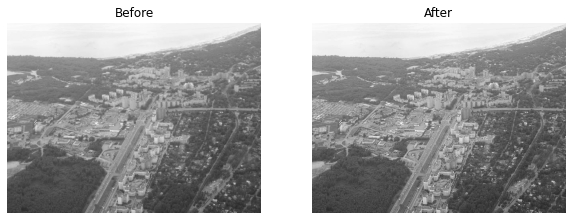

In [69]:
# Load the image
image = cv2.imread("Images/aero3.jpg" ,0)
# Blur the image
gauss = cv2.GaussianBlur(image, (3,3), 0)
# Apply Unsharp masking
unsharp_image = cv2.addWeighted(image, 2, gauss, -1, 0)

fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1,2,1)
a.set_title('Before')
plt.axis("off")
imgplot1 = plt.imshow(image ,cmap='gray', vmin=0, vmax=255)

a = fig.add_subplot(1,2,2)
a.set_title('After')
plt.axis("off")
imgplot1 = plt.imshow(unsharp_image ,cmap='gray', vmin=0, vmax=255)

print(np.array(unsharp_image))

In [70]:
## Edge detection using sobel

image_sub21 = img.filter(ImageFilter.Kernel((3, 3), sobel_gx.flatten(), 1, 0)) 
image_sub22 = img.filter(ImageFilter.Kernel((3, 3), sobel_gy.flatten(), 1, 0)) 
image_sub23 = Image.fromarray(np.absolute(np.array(image_sub21)) + np.absolute( np.array(image_sub22)))

image_sub23.show()

# Chapter 9 -Morphological Image Processing

In [71]:
# Erosion shrinks or thins objects in a binary image
#  it erodes away the boundaries of foreground object

img = Image.open('Images/letterS.jpg').convert('L')
#img.show()
thresh = 128
img2 = img.point(lambda p: p < thresh and 255)
img2.show()
img2.save('Images/S.jpg')

In [72]:
import cv2

kernel1 = np.ones((5,5),np.uint8)
print("\n\n", kernel1)

####################################################

kernel2 = np.array((
                    (0,0,1,0,0),
                    (0,1,0,1,0),
                    (1,0,0,0,1),
                    (0,1,0,1,0),
                    (0,0,1,0,0),
                    ),np.uint8)
print("\n\n", kernel2)

####################################################

kernel3 = np.ones((9,9),np.uint8)
print("\n\n", kernel3)

#####################################################

# Rectangular Kernel
kernel4 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
# array([[1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1]], dtype=uint8)

print("\n\n", kernel4)
##############################################################

# Elliptical Kernel
kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# array([[0, 0, 1, 0, 0],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [0, 0, 1, 0, 0]], dtype=uint8)

print("\n\n", kernel5)

################################################################

# Cross-shaped Kernel
kernel6 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
# array([[0, 0, 1, 0, 0],
#        [0, 0, 1, 0, 0],
#        [1, 1, 1, 1, 1],
#        [0, 0, 1, 0, 0],
#        [0, 0, 1, 0, 0]], dtype=uint8)

print("\n\n", kernel6)
###############################################################





 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


 [[0 0 1 0 0]
 [0 1 0 1 0]
 [1 0 0 0 1]
 [0 1 0 1 0]
 [0 0 1 0 0]]


 [[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]


 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


## Erosion

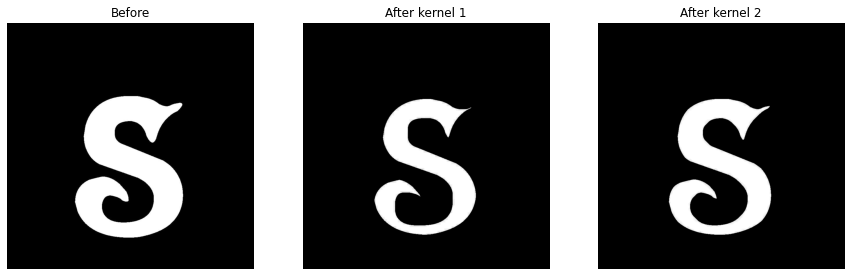

In [73]:
img = cv2.imread('Images/S.jpg',0)
erosion = cv2.erode(img,kernel1,iterations = 5)
erosion1 = cv2.erode(img,kernel2,iterations = 5)


fig = plt.figure(figsize=(15,15))
a = fig.add_subplot(1, 3, 1)
a.set_title('Before')
plt.axis("off")
imgplot1 = plt.imshow(img ,cmap='gray', vmin=0, vmax=255)



a = fig.add_subplot(1, 3, 2)
a.set_title('After kernel 1')
plt.axis("off")
imgplot2 = plt.imshow(erosion,cmap='gray', vmin=0, vmax=255)

a = fig.add_subplot(1, 3, 3)
a.set_title('After kernel 2')
plt.axis("off")
imgplot3 = plt.imshow(erosion1,cmap='gray', vmin=0, vmax=255)


## Dilation

In [74]:
#It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’.
# So it increases the white region in the image or size of foreground object increases.
# Normally, in cases like noise removal, erosion is followed by dilation.
# Because, erosion removes white noises, but it also shrinks our object.
# So we dilate it. Since noise is gone, they won’t come back, but our object area increases.
# It is also useful in joining broken parts of an object.

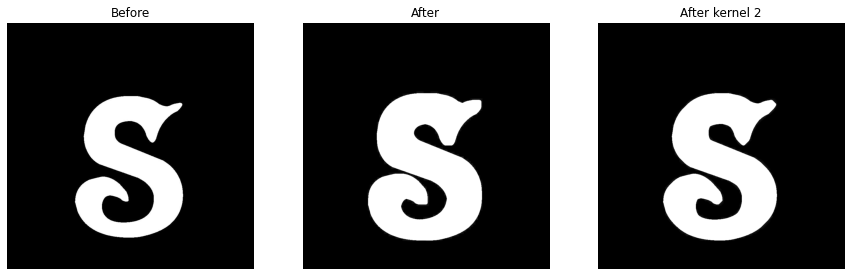

In [75]:

dilation = cv2.dilate(img,kernel1,iterations = 5)
dilation1 = cv2.dilate(img,kernel2,iterations = 5)



fig = plt.figure(figsize=(15,15))
a = fig.add_subplot(1, 3, 1)
a.set_title('Before')
plt.axis("off")
imgplot1 = plt.imshow(img ,cmap='gray', vmin=0, vmax=255)



a = fig.add_subplot(1,3, 2)
a.set_title('After')
plt.axis("off")
imgplot2 = plt.imshow(dilation ,cmap='gray', vmin=0, vmax=255)

a = fig.add_subplot(1, 3, 3)
a.set_title('After kernel 2')
plt.axis("off")
imgplot3 = plt.imshow(dilation1,cmap='gray', vmin=0, vmax=255)

In [76]:
img = Image.open('Images/opening.png')
img.size

box = (0,0,112,150)

img2 = img.crop(box)
img2.save('Images/noisybg.png')

img = Image.open('Images/closing.png')
img.size

box = (0,0,112,150)

img2 = img.crop(box)
img2.save('Images/noisyfg.png')

box = (112,0,224,150)

img2 = img.crop(box)
img2.save('Images/I.png')

## Opening

In [77]:
#Opening is just another name of erosion followed by dilation. It is useful in removing noise(bg noise pixels),

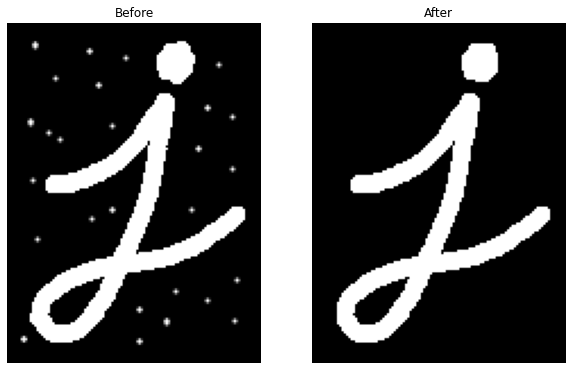

In [78]:
img = cv2.imread('Images/noisybg.png',0)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel1)




fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1, 2, 1)
a.set_title('Before')
plt.axis("off")
imgplot1 = plt.imshow(img ,cmap='gray', vmin=0, vmax=255)



a = fig.add_subplot(1, 2, 2)
a.set_title('After')
plt.axis("off")
imgplot2 = plt.imshow(opening ,cmap='gray', vmin=0, vmax=255)

## Closing

In [79]:
# Closing is reverse of Opening, Dilation followed by Erosion. 
#It is useful in closing small holes inside the foreground objects, or small black points on the object.

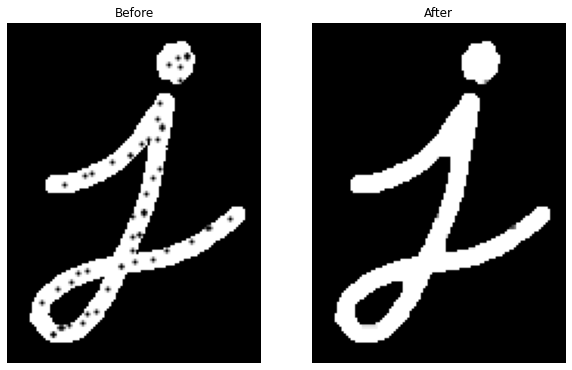

In [80]:
img = cv2.imread('Images/noisyfg.png',0)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)




fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1, 2, 1)
a.set_title('Before')
plt.axis("off")
imgplot1 = plt.imshow(img ,cmap='gray', vmin=0, vmax=255)



a = fig.add_subplot(1, 2, 2)
a.set_title('After')
plt.axis("off")
imgplot2 = plt.imshow(closing ,cmap='gray', vmin=0, vmax=255)

## Morphological Gradient

In [81]:
## It is the difference between dilation and erosion of an image.

#The result will look like the outline of the object.

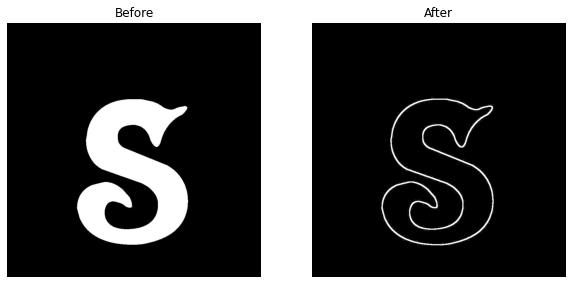

In [82]:
img = cv2.imread('Images/S.jpg',0)
Grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel1)



fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1, 2, 1)
a.set_title('Before')
plt.axis("off")
imgplot1 = plt.imshow(img ,cmap='gray', vmin=0, vmax=255)



a = fig.add_subplot(1, 2, 2)
a.set_title('After')
plt.axis("off")
imgplot2 = plt.imshow(Grad ,cmap='gray', vmin=0, vmax=255)

In [83]:
#It is the difference between input image and Opening of the image

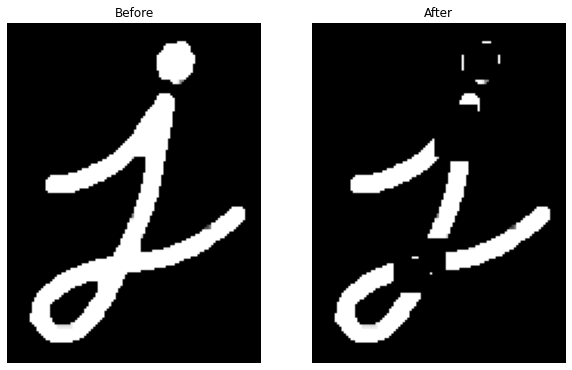

In [84]:
img = cv2.imread('Images/I.png',0)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel3)# 9x9 kernel




fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1, 2, 1)
a.set_title('Before')
plt.axis("off")
imgplot1 = plt.imshow(img ,cmap='gray', vmin=0, vmax=255)



a = fig.add_subplot(1, 2, 2)
a.set_title('After')
plt.axis("off")
imgplot2 = plt.imshow(tophat ,cmap='gray', vmin=0, vmax=255)


In [85]:
#It is the difference between the closing of the input image and input image.

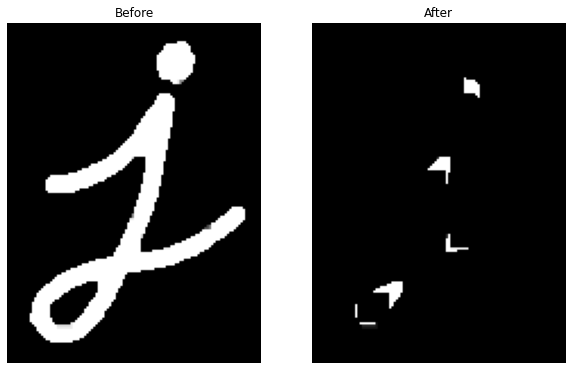

In [86]:
img = cv2.imread('Images/I.png',0)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel3)



fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1, 2, 1)
a.set_title('Before')
plt.axis("off")
imgplot1 = plt.imshow(img ,cmap='gray', vmin=0, vmax=255)



a = fig.add_subplot(1, 2, 2)
a.set_title('After')
plt.axis("off")
imgplot2 = plt.imshow(blackhat ,cmap='gray', vmin=0, vmax=255)


## Hit Or Miss

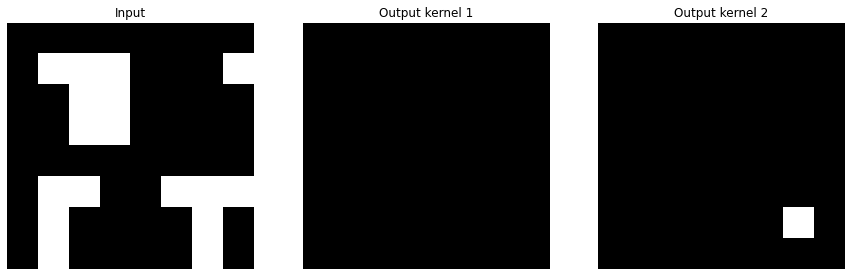

In [87]:
# Create the input image
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 0, 255, 255, 0, 0, 0, 0],
    [0, 0, 255, 255, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 0, 0, 255, 255, 255],
    [0,255, 0, 0, 0, 0, 255, 0],
    [0, 255, 0, 0, 0, 0, 255, 0]), dtype="uint8")
 
# Construct the structuring element (T shape)
# 1 is fg , -1 is bg and 0 is dont care pixel
kernel1 = np.array((
        [1, 1, 1],
        [0, 1, 0],
        [0, 1, 0]), dtype="int")

kernel2 = np.array((
        [1, 1, 1],
        [0, 1, -1],
        [0, 1, -1]), dtype="int")
 
# Apply hit-or-miss transformation 
output_image1 = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel1)
output_image2 = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel2)

fig = plt.figure(figsize=(15,15))
a = fig.add_subplot(1, 3, 1) # 1x3 frame 1st box
a.set_title('Input')
plt.axis("off")
imgplot1 = plt.imshow(input_image ,cmap='gray', vmin=0, vmax=255)


a = fig.add_subplot(1, 3, 2)
a.set_title('Output kernel 1')
plt.axis("off")
imgplot2 = plt.imshow(output_image1 ,cmap='gray', vmin=0, vmax=255)

a = fig.add_subplot(1, 3, 3)
a.set_title('Output kernel 2')
plt.axis("off")
imgplot3 = plt.imshow(output_image2 ,cmap='gray', vmin=0, vmax=255)


#print("\n\n Input Image \n\n" , np.array(input_image) )
#print("\n\n Output Image \n\n" , np.array(output_image1) )

## Boundary Extraction

In [88]:
#The boundary of a set denoted by can be obtained by first eroding
#by and then performing the set difference between and its erosion.

In [89]:
# Create the input image
input_image = 255* np.ones((5,10), dtype="uint8")

input_image[0][3] = input_image[1][3] =input_image[0][9] =input_image[1][9] = 0

# Construct the structuring element (T shape)
# 1 is fg , -1 is bg and 0 is dont care pixel
kernel0 = np.array((
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]), dtype="int")

input_image_pad = np.array(add_margin((input_image) , 1,1,1,1,0)) #padding image

Eroded = cv2.erode(input_image_pad , kernel0 , iterations = 1 ) #eroding image

Eroded = del_margin((np.array(Eroded)) , 1,1,1,1)               #antipadding image



boundary_image = cv2.subtract(input_image , Eroded)             #extraacting boundary         




fig = plt.figure(figsize=(13,13))
a = fig.add_subplot(1, 3, 1) # 1x3 frame 1st box
a.set_title('Input')
#plt.axis("off")
imgplot1 = plt.imshow(input_image ,cmap='gray', vmin=0, vmax=255)

a = fig.add_subplot(1, 3, 2)
a.set_title('Eroded')
#plt.axis("off")
imgplot2 = plt.imshow(Eroded ,cmap='gray', vmin=0, vmax=255)

a = fig.add_subplot(1, 3, 3)
a.set_title('Output ')
#plt.axis("off")
imgplot2 = plt.imshow(boundary_image ,cmap='gray', vmin=0, vmax=255)

TypeError: cannot unpack non-iterable int object

## Hole Filling Algorithm

In [90]:
def fillhole(input_image):
    im_flood_fill = input_image.copy()  # Copy the thresholded image.
    
    # Mask used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = input_image.shape[:2]
    mask = np.zeros((h + 2, w + 2), np.uint8)
    
    # Floodfill from point (0, 0)
    im_flood_fill = im_flood_fill.astype("uint8")
    cv2.floodFill(im_flood_fill, mask, (0, 0), 255)
    
    # Invert floodfilled image
    im_flood_fill_inv = cv2.bitwise_not(im_flood_fill)
    
    # Combine the two images to get the foreground.
    img_out = input_image | im_flood_fill_inv
    
    return img_out

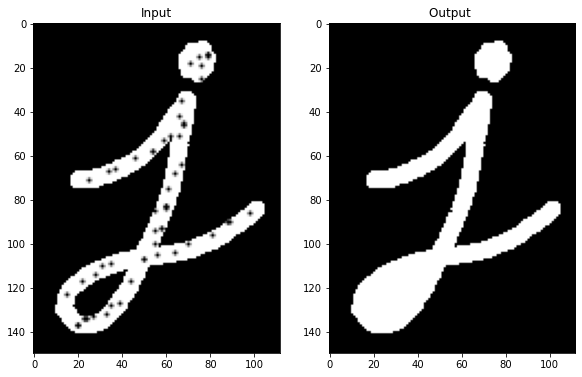

In [91]:
img = cv2.imread("Images/noisyfg.png" ,0)

holefilled = fillhole(img)

fig = plt.figure(figsize=(15,15))

a = fig.add_subplot(1, 3, 1) # 1x3 frame 1st box
a.set_title('Input')
#plt.axis("off")
imgplot1 = plt.imshow(img ,cmap='gray', vmin=0, vmax=255)



a = fig.add_subplot(1, 3, 2)
a.set_title('Output ')
#plt.axis("off")
imgplot2 = plt.imshow(holefilled ,cmap='gray', vmin=0, vmax=255)

## Convex Hull

In [93]:
# Load the image
img1 = cv2.imread('Images/pic1.png')

# Convert it to greyscale
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, thresh = cv2.threshold(img,50,255,0)

# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# For each contour, find the convex hull and draw it on the original image.
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    cv2.drawContours(img1, [hull], -1, (255, 0, 0), 2)
    
# Display the final convex hull image
fig = plt.figure(figsize=(15,15))

a = fig.add_subplot(1, 2, 1)
a.set_title('Input')
#plt.axis("off")
imgplot1 = plt.imshow(img ,cmap='gray', vmin=0, vmax=255)

a = fig.add_subplot(1, 2, 2) 
a.set_title('Output')
#plt.axis("off")
imgplot1 = plt.imshow(img1 ,cmap='gray', vmin=0, vmax=255)




error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\convhull.cpp:137: error: (-215) total >= 0 && (depth == 5 || depth == 4) in function cv::convexHull


## Thinning

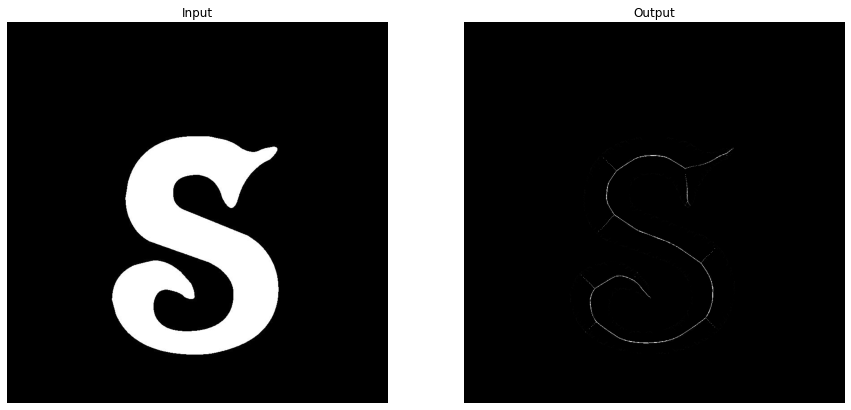

In [94]:
img = cv2.imread("Images/S.jpg",0)

# Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Create an empty output image to hold values
thin = np.zeros(img.shape,dtype='uint8')
img1 = img.copy()
 
# Loop until erosion leads to an empty set
while (cv2.countNonZero(img1)!=0):
    # Erosion
    erode = cv2.erode(img1,kernel)
    # Opening on eroded image
    opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
    # Subtract these two
    subset = erode - opening
    # Union of all previous sets
    thin = cv2.bitwise_or(subset,thin)
    # Set the eroded image for next iteration
    img1 = erode.copy()
    
# Display the final convex hull image
fig = plt.figure(figsize=(15,15))

a = fig.add_subplot(1, 2, 1)
a.set_title('Input')
plt.axis("off")
imgplot1 = plt.imshow(img ,cmap='gray', vmin=0, vmax=255)

a = fig.add_subplot(1, 2, 2) 
a.set_title('Output')
plt.axis("off")
imgplot1 = plt.imshow(thin ,cmap='gray', vmin=0, vmax=255)

## THickening

In [95]:
# img = cv2.imread("Images/S.jpg",0)

# # Structuring Element
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# # Create an empty output image to hold values
# thick = np.zeros(img.shape,dtype='uint8')
# img1 = img.copy()
 
# # Loop until erosion leads to an empty set
# while (cv2.countNonZero(img1)==0):
#     # Erosion
#     dilate = cv2.dilate(img1,kernel)
#     # Opening on eroded image
#     closing = cv2.morphologyEx(dilate,cv2.MORPH_CLOSE,kernel)
#     # Subtract these two
#     subset = dilate + closing
#     # Union of all previous sets
#     thick = cv2.bitwise_and(subset,thick)
#     # Set the eroded image for next iteration
#     img1 = dilate.copy()
    
# # Display the final convex hull image
# fig = plt.figure(figsize=(15,15))

# a = fig.add_subplot(1, 2, 1)
# a.set_title('Input')
# plt.axis("off")
# imgplot1 = plt.imshow(img ,cmap='gray', vmin=0, vmax=255)

# a = fig.add_subplot(1, 2, 2) 
# a.set_title('Output')
# plt.axis("off")
# imgplot1 = plt.imshow(thick ,cmap='gray', vmin=0, vmax=255)

## Skeleton

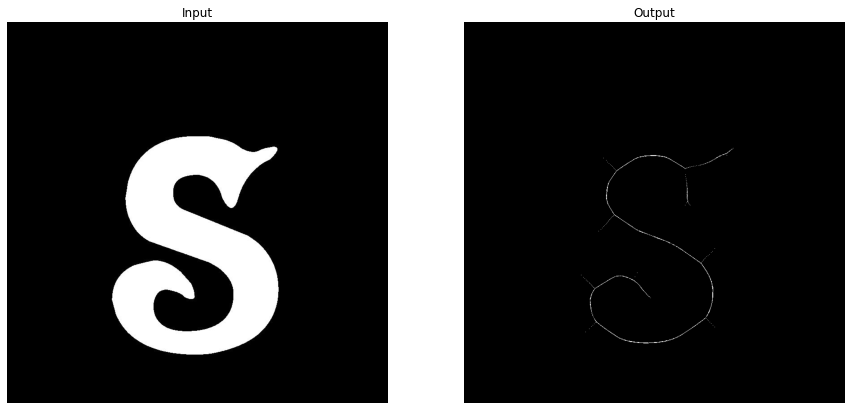

In [96]:
img1 = cv2.imread('Images/S.jpg',0)
img = img1.copy()
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
        
        
# Display the final convex hull image
fig = plt.figure(figsize=(15,15))

a = fig.add_subplot(1, 2, 1)
a.set_title('Input')
plt.axis("off")
imgplot1 = plt.imshow(img1 ,cmap='gray', vmin=0, vmax=255)

a = fig.add_subplot(1, 2, 2) 
a.set_title('Output')
plt.axis("off")
imgplot1 = plt.imshow(skel ,cmap='gray', vmin=0, vmax=255)

# Apply Filter on Array of Image

In [ ]:
imgarr = np.array((
        (10, 12, 10, 11, 12),
        (11,200, 201, 200, 202),
        (11, 200, 11, 12, 10),
        (10, 201, 10, 11, 11),
        (10, 200, 11, 12, 10),
      ))

print(imgarr)

In [ ]:
sobel_gx = np.array((
            (-1,-2,-1),
            (0,0,0),
            (1,2,1),
            ))

sobel_gy = np.array((
            (-1,0,1),
            (-2,0,2),
            (-1,0,1),
            ))

print(sobel_gx)
print("\n\n")
print(sobel_gy)

## Add and Remove Margin of Array

In [ ]:
#padding

def add_margin(array, top, right, bottom, left , intensity): 
    
    width, height = array.shape
    new_width = width + right + left
    new_height = height + top + bottom
    Result = intensity * np.ones((new_width,new_height),dtype="uint8")
    
    for i in range(top,new_width-bottom):
        for j in range(left,new_height-right):
            Result[i][j] = array[i-top][j-right]
        
    return Result

#anti_padding

def del_margin(array, top, right, bottom, left):
    
    width, height = array.shape
    new_width = width - right - left
    new_height = height - top - bottom
    Result = np.zeros((new_width,new_height),dtype="uint8")
    
    for i in range(0,new_width):
        for j in range(0,new_height):
            Result[i][j] = array[i+top][j+right]
    return Result



In [ ]:
img_new = add_margin(imgarr, 1, 1, 1, 1 , 0)
print("\n\n" ,img_new)

img_new2 = del_margin(img_new, 1, 1, 1, 1 )
print("\n\n" , img_new2)

img_new3 = add_margin(imgarr, 2,2,2,2 , 255)
print("\n\n" ,img_new3)

img_new4 = del_margin(img_new3, 2, 2, 2, 2)
print("\n\n" , img_new4)

## Apply 3x3 and 5x5 filter on Array

In [ ]:

def applyFilter3 (array , mask):
    
    width, height = array.shape
    Result = np.zeros((width,height),dtype=int)
    
    for i in range(1,width - 1):
        for j in range(1, height - 1):
              Result[i][j] = ((mask[0][0]*array[i-1][j-1]) + (mask[0][1]*array[i-1][j])+ (mask[0][2]*array[i-1][j+1])
                              + (mask[1][0]*array[i][j-1]) + (mask[1][1]*array[i][j]) + (mask[1][2]*array[i][j+1])  
                              + (mask[2][0]*array[i+1][j-1]) + (mask[2][1]*array[i+1][j]) + (mask[2][2]*array[i+1][j+1])) 
    return Result


def applyFilter5 (array , mask):
    
    width, height = array.shape
    Result = np.zeros((width,height),dtype=int)
    
    for i in range(1,width - 1):
        for j in range(1, height - 1):
              Result[i][j] = ((mask[1][1]*array[i-1][j-1]) + (mask[1][2]*array[i-1][j])+ (mask[1][3]*array[i-1][j+1])
                              + (mask[2][1]*array[i][j-1]) + (mask[2][2]*array[i][j]) + (mask[2][3]*array[i][j+1])  
                              + (mask[3][1]*array[i+1][j-1]) + (mask[3][2]*array[i+1][j]) + (mask[3][3]*array[i+1][j+1])
                              
                              + (mask[0][0]*array[i-2][j-2]) + (mask[0][1]*array[i-2][j-1]) + (mask[0][2]*array[i-2][j]) + (mask[0][3]*array[i-2][j+1])+ (mask[0][4]*array[i-2][j+2]) 
                              + (mask[1][0]*array[i-1][j-2]) + (mask[1][4]*array[i-1][j+2]) 
                              + (mask[3][0]*array[i+1][j-2]) + (mask[3][4]*array[i+1][j+2]) 
                              + (mask[4][0]*array[i+2][j-2]) + (mask[4][1]*array[i+2][j-1]) + (mask[4][2]*array[i+2][j]) + (mask[4][3]*array[i+2][j+1])+ (mask[4][4]*array[i+2][j+2])) 
                      
    return Result
    

In [ ]:
# print(sobel_gx)
# print("\n\n" ,img_new)

Result1 = applyFilter3(img_new , sobel_gx)
Result1 = del_margin(Result1, 1, 1, 1, 1)
print("\n\n" ,Result1)
Result1 = np.absolute(Result1)
print("\n\n" ,Result1)

Result2 = applyFilter3(img_new , sobel_gy)
Result2 = del_margin(Result2, 1, 1, 1, 1)
print("\n\n" ,Result2)
Result2 = np.absolute(Result2)
print("\n\n" ,Result2)

In [ ]:

print(Result1+Result2)

In [ ]:
img2arr = np.array((
        (10, 20, 25, 15, 15 ,14 ,12),
        (12, 14, 150, 175, 170 , 13 , 20),
        (10, 12, 172, 189, 175 , 20 , 14),
        (14, 180, 185, 172, 180 , 14 ,15),
        (14, 180, 175, 173, 180 , 185 ,10),
        (12, 9, 181, 180, 154 , 150 , 10),
        (13, 10, 11, 12, 14 , 12 ,11),
        
      ))

print(imgarr)

img2=Image.fromarray(img2arr)
#img=ImageOps.grayscale(img)
img2 = img2.convert('L')
#img.show()
print("\n\n" , np.asarray(img2))

In [ ]:
print("\n\n" , np.array(img2))

fig = plt.figure(figsize =(10, 7)) 

plt.hist(np.array(img2),bins = np.arange(255))  
  
plt.title("Histogram")  
  
# show plot 
plt.show() 

In [ ]:
print(np.array(img2).min() , np.array(img2).max())
init_thresh = np.mean([9,189])
print("thresh = " ,init_thesh)

In [ ]:
img21 = img2.point(lambda p: p > init_thesh and 255)
print("\n\n" , np.asarray(img21))

## Basic Global Thresholding

In [ ]:
def global_threshold(pilimg , thresh0):

    imgarr = np.array(pilimg)

    condition1 = imgarr > init_thesh
    condition2 = imgarr <= init_thesh
    
    high = imgarr[condition1]
    low = imgarr[condition2] 

    thresh = round((high.mean() + low.mean())/2)

    if abs(thresh - thresh0) > 0:
        return global_threshold(pilimg , thresh)
    else:
        return thresh

print("initial Thresh = " ,init_thresh)

new_thresh = global_threshold(img2 , init_thresh)

print("Global Thresholding Algo = ", new_thresh)

### Huffman code

In [ ]:
import math
import sys
global probabilities
probabilities = []

class HuffmanCode:
    def __init__(self,probability):
        self.probability = probability

    def position(self, value, index):
        for j in range(len(self.probability)):
            if(value >= self.probability[j]):
                return j
        return index-1

    def characteristics_huffman_code(self, code):
        length_of_code = [len(k) for k in code]

        mean_length = sum([a*b for a, b in zip(length_of_code, self.probability)])

        print("Average length of the code: %f" % mean_length)
        #print("Efficiency of the code: %f" % (entropy_of_code/mean_length))

    def compute_code(self):
        num = len(self.probability)
        huffman_code = ['']*num

        for i in range(num-2):
            val = self.probability[num-i-1] + self.probability[num-i-2]
            if(huffman_code[num-i-1] != '' and huffman_code[num-i-2] != ''):
                huffman_code[-1] = ['0' + symbol for symbol in huffman_code[-1]]
                huffman_code[-2] = ['1' + symbol for symbol in huffman_code[-2]]
            elif(huffman_code[num-i-1] != ''):
                huffman_code[num-i-2] = '1'
                huffman_code[-1] = ['0' + symbol for symbol in huffman_code[-1]]
            elif(huffman_code[num-i-2] != ''):
                huffman_code[num-i-1] = '0'
                huffman_code[-2] = ['1' + symbol for symbol in huffman_code[-2]]
            else:
                huffman_code[num-i-1] = '0'
                huffman_code[num-i-2] = '1'

            position = self.position(val, i)
            probability = self.probability[0:(len(self.probability) - 2)]
            probability.insert(position, val)
            if(isinstance(huffman_code[num-i-2], list) and isinstance(huffman_code[num-i-1], list)):
                complete_code = huffman_code[num-i-1] + huffman_code[num-i-2]
            elif(isinstance(huffman_code[num-i-2], list)):
                complete_code = huffman_code[num-i-2] + [huffman_code[num-i-1]]
            elif(isinstance(huffman_code[num-i-1], list)):
                complete_code = huffman_code[num-i-1] + [huffman_code[num-i-2]]
            else:
                complete_code = [huffman_code[num-i-2], huffman_code[num-i-1]]

            huffman_code = huffman_code[0:(len(huffman_code)-2)]
            huffman_code.insert(position, complete_code)

        huffman_code[0] = ['1' + symbol for symbol in huffman_code[0]]
        huffman_code[1] = ['0' + symbol for symbol in huffman_code[1]]

        if(len(huffman_code[1]) == 0):
            huffman_code[1] = '0'

        count = 0
        final_code = ['']*num

        for i in range(2):
            for j in range(len(huffman_code[i])):
                final_code[count] = huffman_code[i][j]
                count += 1

        final_code = sorted(final_code, key=len)
        return final_code

string = input("Enter the string to compute Huffman Code: ")

freq = {}
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
length = len(string)

probabilities = [float("{:.2f}".format(frequency[1]/length)) for frequency in freq]
probabilities = sorted(probabilities, reverse=True)

huffmanClassObject = HuffmanCode(probabilities)
P = probabilities

huffman_code = huffmanClassObject.compute_code()

print(' Char | Huffman code ')
print('----------------------')

for id,char in enumerate(freq):
    if huffman_code[id]=='':
        print(' %-4r |%12s' % (char[0], 0))
        continue
    print(' %-4r |%12s' % (char[0], huffman_code[id]))

huffmanClassObject.characteristics_huffman_code(huffman_code)

In [ ]:
### Huffman Compression

print("Huffan Compression Program")
print("***********************************")

my_str = input("Please enter a string to compress :")
len_my_str = len(my_str)
print("Your message is : ")
print(my_str)
print("Your Data is" , len_my_str * 8 , "bits long !")



### creates alist of characters and their frequncy and a list of characters in use

letters = []
only_letters = []

for letter in my_str:
    if letter not in letters:
        freq = my_str.count(letter)
        letters.append(freq)
        letters.append(letter)
        only_letters.append(letter)


## generates base-level nodes for huffman tree frequency and letter

nodes = []
while len(letters) > 0:
    nodes.append(letters[0:2])
    letters = letters[2:]
nodes.sort()
huffman_tree = []
huffman_tree.append(nodes)


## recursively combines basenodes to crate the huffman tree and allocates wither a 0 or 1 to each
## pair of nodes prop to combining which weill be later used to create the binary code for each letter.


def combine(nodes):
    pos = 0
    newnode = []
    # get 2 lowest nodes
    if len(nodes) > 1:
        nodes.sort()
        ## adds in the 0,1 for later use
        nodes[pos].append("0")
        nodes[pos+1].append("1")
        combined_node1 = (nodes[pos][0] + nodes[pos+1][0])
        combined_node2 = (nodes[pos][1] + nodes[pos+1][1])
        newnode.append(combined_node1)
        newnode.append(combined_node2)
        newnodes = []
        newnodes.append(newnode)
        newnodes = newnodes + nodes[2:]
        nodes = newnodes
        huffman_tree.append(nodes)
        combine(nodes)
    return huffman_tree


newnodes = combine(nodes)

## invert the tree

huffman_tree.sort(reverse = True)
print("Here is Huffman Tree , Showing the merged nodes and binary pathways.")

## removes duplicate items in the huffman tree and creates an array CHECKLIST with just the nodes and the correct

checklist = []
for level in huffman_tree:
    for node in level:
        if node not in checklist:
            checklist.append(node)
        else:
            level.remove(node)

count = 0
for level in huffman_tree:
    print("LEVEL ",count,":",level)
    count += 1

print()


### builds the binary codess for each character

letter_binary = []
if len(only_letters) == 1:
    letter_code = [only_letters[0] ,"0"]
    letter_binary.append(letter_code * len(my_string))
else:
    for letter in only_letters:
        lettercode = ""
        for node in checklist:
            if len(node) > 2 and letter in node[1]:
                lettercode = lettercode + node[2]
        letter_code = [letter,lettercode]
        letter_binary.append(letter_code)


## outputs letters with binary codes

print("Your binary codes are as follows:")
for letter in letter_binary:
    print(letter[0] , letter[1])

## creates bitstring of the oroginal message using new codes generated for each letter

bitstring = ""
for character in my_str:
    for item in letter_binary:
        if character in item:
            bitstring = bitstring + item[1]

## convert the string to an actual binary digit

binary = ((bin(int(bitstring , base = 2))))

## summary of compressed data

uncompressed_file_size = len(my_str)*8
compressed_file_size = len(binary) - 2

print("\n\nYour original file size was" ,uncompressed_file_size , "bits.\t The compreesed file is of " ,compressed_file_size , "bits")

print("The bits saved are : " ,uncompressed_file_size - compressed_file_size )
print("Binary code is ",binary[2:])



In [ ]:
# Example Huffman coding implementation
# Distributions are represented as dictionaries of { 'symbol': probability }
# Codes are dictionaries too: { 'symbol': 'codeword' }

def Huffman(p):
    '''Return a Huffman code for an ensemble with distribution p.'''
    assert(round(sum(p.values()) ,2) == 1.0) # Ensure probabilities sum to 1

    # Base case of only two symbols, assign 0 or 1 arbitrarily
    if(len(p) == 2):
        return dict(zip(p.keys(), ['0', '1'])) ## for root node

    # Create a new distribution by merging lowest prob. pair
    p_prime = p.copy()
    a1, a2 = lowest_prob_pair(p) # keys of lowest prob
    p1, p2 = p_prime.pop(a1), p_prime.pop(a2)  # p_prime removes items a1 and a2 , value of items is in p1 & p2
    p_prime[a1 + a2] = p1 + p2 # new item added by combining above

    # Recurse and construct code on new distribution
    c = Huffman(p_prime)
    ca1a2 = c.pop(a1 + a2) # binary values of prev nodes , delete combined node
    c[a1], c[a2] = ca1a2 + '0', ca1a2 + '1' # divide combined node and attach 0 and 1 to left ,right child resp.

    return c

def lowest_prob_pair(p):
    '''Return pair of symbols from distribution p with lowest probabilities.'''
    assert(len(p) >= 2) # Ensure there are at least 2 symbols in the dist.

    sorted_p = sorted(p.items(), key=lambda x: x[1]) # sort dict items by 2nd value of dict
    return sorted_p[0][0], sorted_p[1][0]            # return 1st and 2nd key of sorted dict

In [ ]:
ex1 = { 's': 0.5, 'a': 0.25, 'r': 0.25 }
Huffman(ex1)


In [ ]:
ex1 = { 's': 0.1, 'n': 0.3, 'd': 0.2 , 'e': 0.3 , 'r' : 0.1 }

Huffman(ex1)

In [ ]:
import numpy as np



my_str = input("Please enter a string to compress :")
len_my_str = len(my_str)
print("Your message is : ")
print(my_str)
print("Your Data is" , len_my_str * 8 , "bits long !")
my_str = my_str * 1000000


### creates alist of characters and their frequncy and a list of characters in use

letters = []
frequency = []
freq_dict = {}


for letter in my_str:
    if letter not in letters: # for unique letters
        freq = my_str.count(letter)
        freq_dict[letter] = freq
        frequency.append(freq)
        letters.append(letter)
        #only_letters.append(letter)
        
        
letters,frequency = np.array(letters),np.array(frequency)      

prob = np.array(freqency / np.sum(freqency))

combined_dict = dict(zip(letters,prob))  
        
# print(letters)
# print(freqency)
# print(prob)
# print(freq_dict)
# print(combined_dict)
# huffman(combined_dict)

In [ ]:
print(freq_dict.values())

#print(sum(freq_dict.values()))
prob1 = np.array(list(freq_dict.values())) / sum(freq_dict.values())
combined_dict1 = dict(zip(letters,prob1))

print(list(freq_dict.keys()))
print(prob1)
print(combined_dict1)

In [ ]:
def freqdict_to_probdict(freq_dict):
    import numpy as np
    prob = np.array(list(freq_dict.values())) / sum(freq_dict.values())
    new_dict = dict(zip(list(freq_dict.keys()),prob.round(5)))
    return new_dict


def str_to_probdict(my_str):
    import numpy as np
    letters = []
    frequency = []
    
    for letter in my_str:
        if letter not in letters: # for unique letters
            freq = my_str.count(letter)
            frequency.append(freq)
            letters.append(letter)
               
    letters,frequency = np.array(letters),np.array(frequency)      
    prob = np.array(frequency / np.sum(frequency))
    combined_dict = dict(zip(letters,prob))
    return combined_dict
    

In [ ]:
print(freq_dict)
freqdict_to_probdict(freq_dict)
print(sum(my.values()))


In [ ]:
str = "ssaaaahillll"
#print(str)
newdict = str_to_probdict(str)
print(newdict)
print(sum(newdict.values()))

In [ ]:
ex1 = { 's': 0.5, 'a': 0.25, 'r': 0.25 }
print(ex1)

In [ ]:
sorted_p = sorted(ex1.items(), key=lambda x: x[1])
print(sorted_p)

In [ ]:
a1, a2 = 'a' ,'r'
print(a1+a2)

In [ ]:
p1, p2 = ex1.pop(a1), ex1.pop(a2)
print(p1 ,p2)

In [ ]:
# Example Huffman coding implementation
# Distributions are represented as dictionaries of { 'symbol': probability }
# Codes are dictionaries too: { 'symbol': 'codeword' }

def Huffman(p):
    '''Return a Huffman code for an ensemble with distribution p.'''
    assert(round(sum(p.values()) ,2) == 1.0) # Ensure probabilities sum to 1

    # Base case of only two symbols, assign 0 or 1 arbitrarily
    if(len(p) == 2):
        return dict(zip(p.keys(), ['0', '1'])) ## for root node

    # Create a new distribution by merging lowest prob. pair
    p_prime = p.copy()
    a1, a2 = lowest_prob_pair(p) # keys of lowest prob
    p1, p2 = p_prime.pop(a1), p_prime.pop(a2)  # p_prime removes items a1 and a2 , value of items is in p1 & p2
    p_prime[a1 + a2] = p1 + p2 # new item added by combining above

    # Recurse and construct code on new distribution
    c = Huffman(p_prime)
    ca1a2 = c.pop(a1 + a2) # binary values of prev nodes , delete combined node
    c[a1], c[a2] = ca1a2 + '0', ca1a2 + '1' # divide combined node and attach 0 and 1 to left ,right child resp.

    return c

def lowest_prob_pair(p):
    '''Return pair of symbols from distribution p with lowest probabilities.'''
    assert(len(p) >= 2) # Ensure there are at least 2 symbols in the dist.

    sorted_p = sorted(p.items(), key=lambda x: x[1]) # sort dict items by 2nd value of dict
    return sorted_p[0][0], sorted_p[1][0]            # return 1st and 2nd key of sorted dict

In [ ]:
def freqdict_to_probdict(freq_dict):
    import numpy as np
    prob = np.array(list(freq_dict.values())) / sum(freq_dict.values())
    new_dict = dict(zip(list(freq_dict.keys()),prob.round(5)))
    return new_dict


def str_to_probdict(my_str):
    import numpy as np
    letters = []
    frequency = []
    
    for letter in my_str:
        if letter not in letters: # for unique letters
            freq = my_str.count(letter)
            frequency.append(freq)
            letters.append(letter)
               
    letters,frequency = np.array(letters),np.array(frequency)      
    prob = np.array(frequency / np.sum(frequency))
    combined_dict = dict(zip(letters,prob))
    return combined_dict

### Driver code for compressing string using HUFFMAN

In [ ]:
###

my_str = input("Please enter a string to compress :")
print("Your message is : ")
print(my_str)
old_size = len(my_str) * 8
print("Your Data is of " , old_size , "bits !")
newdict = str_to_probdict(my_str)
huffmancode = Huffman(newdict)
print(huffmancode)

binary = ""

for letter in my_str:
    binary += str(huffmancode[letter])
    
print("Binary code is :" ,binary)
new_size = len(binary)
print("Your Compressed Data is of" , new_size , "bits !")
print("you saved" , old_size - new_size , "Bits using Huffman Code for compression !")
print("Average bits per character : ", round(new_size / len(my_str) ,2))
print("Compression Ratio for this word is :", int(old_size/new_size) ,": 1")

### Driver code for compressing prob dict using HUFFMAN

In [ ]:
n = int(input("Please enter no of items you want in dictionary  :"))

dict_prob = {}

for i in range(n):
    key = input("enter key :")
    print("Enter value for key : ",key)
    value = float(input())
    dict_prob[key] = value
    
print("\n\n",dict_prob)

old_size = sum(dict_prob.values()) * 800
print("\nYour Data is of " , old_size , "bits !")
huffmancodedict = Huffman(dict_prob)


sorted_old = dict(sorted(dict_prob.items(), key=lambda x: x[0])) # sort dict items by 2nd value of dict
sorted_new = dict(sorted(huffmancodedict.items(), key=lambda x: x[0])) # sort dict items by 2nd value of dict

print("\n\nThe Huffman code for given dictionary is : \n",sorted_new)

new_bits = list(sorted_new.values()) 
bits_len = np.array([len(i) for i in new_bits])

len_dict = dict(zip(list(sorted_new.keys()),bits_len))
print("\n\nThe New length of bits : \n",len_dict)


freq = np.array(list(sorted_old.values()))

new_size = round(sum(freq * bits_len)*100 ,2)


print("\n\nYour Compressed Data is of" , new_size , "bits !")
print("\nyou saved" , old_size - new_size , "Bits using Huffman Code for compression !")
print("Average bits per character : ", round(new_size / 100 ,2))
print("Compression Ratio is :", int(old_size/new_size) ,": 1")

## Image array to freq distribution

In [ ]:
imgarr = np.array(([21,21,21,95,169,243,243,243],
                  [21,21,21,95,169,243,243,243],
                  [21,21,21,95,169,243,243,243],
                  [21,21,21,95,169,243,243,243]))
print(imgarr)

unique_elements, counts_elements = np.unique(imgarr, return_counts=True)
dict_freq = dict(zip(unique_elements ,counts_elements ))
dict_freq



In [ ]:
print(imgarr)
print("\n\nFrequency of intensities :\n" ,dict_freq)

old_size = sum(dict_freq.values()) * 8
print("\nYour Data is of " , old_size , "bits !")
newdict = freqdict_to_probdict(dict_freq)
huffmancodedict = Huffman(newdict)


sorted_old = dict(sorted(dict_freq.items(), key=lambda x: x[0])) # sort dict items by 2nd value of dict
sorted_new = dict(sorted(huffmancodedict.items(), key=lambda x: x[0])) # sort dict items by 2nd value of dict

print("\n\nThe Huffman code for given dictionary is : \n",sorted_new)

new_bits = list(sorted_new.values()) 
bits_len = np.array([len(i) for i in new_bits])

len_dict = dict(zip(list(sorted_new.keys()),bits_len))
print("\n\nThe New length of bits : \n",len_dict)


freq = np.array(list(sorted_old.values()))

new_size = sum(freq * bits_len)


print("\n\nYour Compressed Data is of" , new_size , "bits !")
print("\nyou saved" , old_size - new_size , "Bits using Huffman Code for compression !")
print("Average bits per intensity : ", round(new_size / sum(dict_freq.values()) ,2))
print("Compression Ratio  is :", int(old_size/new_size) ,": 1")

### Driver code for compressing freq dict using HUFFMAN

In [ ]:
n = int(input("Please enter no of items you want in dictionary  :"))

dict_freq = {}

for i in range(n):
    key = input("enter key :")
    print("Enter value for key : ",key)
    value = int(input())
    dict_freq[key] = value
    
print("\n\n",dict_freq)

old_size = sum(dict_freq.values()) * 8
print("\nYour Data is of " , old_size , "bits !")
newdict = freqdict_to_probdict(dict_freq)
huffmancodedict = Huffman(newdict)


sorted_old = dict(sorted(dict_freq.items(), key=lambda x: x[0])) # sort dict items by 2nd value of dict
sorted_new = dict(sorted(huffmancodedict.items(), key=lambda x: x[0])) # sort dict items by 2nd value of dict

print("\n\nThe Huffman code for given dictionary is : \n",sorted_new)

new_bits = list(sorted_new.values()) 
bits_len = np.array([len(i) for i in new_bits])

len_dict = dict(zip(list(sorted_new.keys()),bits_len))
print("\n\nThe New length of bits : \n",len_dict)


freq = np.array(list(sorted_old.values()))

new_size = sum(freq * bits_len)


print("\n\nYour Compressed Data is of" , new_size , "bits !")
print("\nyou saved" , old_size - new_size , "Bits using Huffman Code for compression !")
print("Average bits per character: ", round(new_size / sum(dict_freq.values()) ,2))
print("Compression Ratio is :", int(old_size/new_size) ,": 1")


## HUFFMAN Decoding

In [ ]:
huffdict = {'a1': '0', 'a2': '10', 'a3': '1110', 'a4': '1111', 'a5': '1101', 'a6': '1100'}
#huffdict = dict(reversed(list(huffdict.items()))) to reverse the list
print("Huffman codes are :\n",huffdict)

huffcode = "0101101010010000011000100"
print("\nDecode the code : ",huffcode)


def huffmanDecode (dictionary, text):
    res = ""
    while text:
        for k in dictionary.values():
            if text.startswith(k):
                res += str([key for(key,value) in dictionary.items() if value == k][0])
                text = text[len(k):]
                
    
    return res

msg = huffmanDecode(huffdict , huffcode)
print("\nDeocded message is : ",msg)


## Driver code for Huffman decoding

In [ ]:
huffdict = {'a1': '0', 'a2': '10', 'a3': '1110', 'a4': '1111', 'a5': '1101', 'a6': '1100'}
#huffdict = dict(reversed(list(huffdict.items()))) to reverse the list
print("Huffman codes are :\n",huffdict)

huffcode = "0101101010010000011000100"
print("\nDecode the code : ",huffcode)

msg = huffmanDecode(huffdict , huffcode)
print("\nDeocded message is : ",msg)

## Arithmatic Coding for compression

In [ ]:
def Arithmatic_coding(dictionary , message):
    '''Return a Arithmatic code for a message.'''
    assert(round(sum(dictionary.values()) ,2) == 1.0) # Ensure probabilities sum to 1
    
    import numpy as np
    dict_keys = np.array(list(dictionary.keys()))
    breaks = np.cumsum(list(dictionary.values()))
    new_dict = dict(zip(dict_keys,breaks))
    dict_vals = np.array(list(new_dict.values()))
    
    lower, upper = 0 , 1
    dist = round(upper-lower , 5)
    for letter in message:
        upper = round(lower + dist * float(new_dict[str(letter)]),5)
        UP = int(np.where(dict_keys == letter)[0])
        if UP != 0:
            lower = round(lower + dist * float(dict_vals[UP - 1]),5)
        dist = round(upper-lower , 5)
        #print("letter = ", letter , "UP = ",UP ,"upper = " ,upper , "lower = ",lower ,"dist = ",dist)

    codeword = (upper+lower)/2
    
    return codeword


In [ ]:
n = int(input("Please enter no of items you want in dictionary  :"))

dict_prob = {}

for i in range(n):
    key = input("enter key :")
    print("Enter value for key : ",key)
    value = float(input())
    dict_prob[key] = value
    
print("\n\nprobability model is",dict_prob)

assert(round(sum(dict_prob.values()) ,2) == 1.0) # Ensure probabilities sum to 1

msg = input("\n\nPlease enter the message :")

code = Arithmatic_coding(dict_prob , msg)
print("\n\nCodeword for your message '", msg,"' is '",code,"'")




 ## Arithmatic decoding

In [ ]:
def Arithmatic_decoding(dictionary , code):
    '''Return a Arithmatic decoded message.'''
    import numpy as np
    assert(round(sum(dictionary.values()) ,2) == 1.0) # Ensure probabilities sum to 1
    
    lower, upper = 0 , 1
    dist = upper - lower
    dict_keys = np.array(list(dictionary.keys()))
    breaks = np.cumsum(list(dictionary.values()))
    new_dict = dict(zip(dict_keys,breaks))
    
    dict_vals = np.array(list(new_dict.values()))
    dict_vals = np.append(0,dict_vals)
    breaks = np.append(0,breaks)
    
    msg = np.array([])
    while(np.array_equal(sorted(np.unique(msg)), sorted(dict_keys)) == False):
    
        LB = int(np.where(breaks <= code)[0][-1])
        UB = int(np.where(breaks > code)[0][0])
        #print("UB = ",UB , "LB = ",LB )
        upper , letter = round(breaks[UB],20)  ,dict_keys[LB]
        if LB != 0:
            lower = round(breaks[LB],20)

        dist = round(upper - lower ,20)
        msg = np.append(msg ,str(letter))
        breaks = lower + (dist * dict_vals)
        #breaks[0] = lower
        #print(breaks)
        #print("letter = ", letter, "upper = ",upper ,"lower = " ,lower ,"dist =" ,dist ,"msg = " ,msg)

    
    message = ''.join(msg)
    return message

    
    

In [ ]:
n = int(input("Please enter no of items you want in dictionary  :"))

dict_prob = {}

for i in range(n):
    key = input("enter key :")
    print("Enter value for key : ",key)
    value = float(input())
    dict_prob[key] = value
    
print("\n\nprobability model is",dict_prob)

assert(round(sum(dict_prob.values()) ,2) == 1.0) # Ensure probabilities sum to 1

code = float(input("\n\nPlease enter the codeword to decode :"))

msg = Arithmatic_decoding(dict_prob , code)
print("\n\nDecoded message from your codeword ", code," is '",msg,"'")

In [ ]:
import numpy as np

dictionary = { 'e': 0.3, 'n': 0.3, 't' : 0.2 , 'w' : 0.1, '$': 0.1  }
codeword = 0.81611


assert(round(sum(dictionary.values()) ,2) == 1.0) # Ensure probabilities sum to 1
    
lower, upper = 0 , 1
dist = upper - lower

dict_keys = np.array(list(dictionary.keys()))


print("keys= ",dict_keys)

breaks = np.cumsum(list(dictionary.values()))


new_dict = dict(zip(dict_keys,breaks))

dict_vals = np.array(list(new_dict.values()))
dict_vals = np.append(0,dict_vals)
print("vals = ",dict_vals)

breaks = np.append(0,breaks)
print("brks = " ,breaks)
print("dict = ",new_dict)






In [ ]:
msg = np.array([])

while(np.array_equal(sorted(np.unique(msg)), sorted(dict_keys)) == False):
    
    print(np.array_equal(sorted(np.unique(msg)), sorted(dict_keys)))
    LB = int(np.where(breaks < codeword)[0][-1])
    UB = int(np.where(breaks > codeword)[0][0])
    print("UB = ",UB , "LB = ",LB )
    upper , letter = round(breaks[UB],5)  ,dict_keys[LB]
    if LB != 0:
        lower = round(breaks[LB],5)
        
    dist = round(upper - lower ,5)
    msg = np.append(msg ,str(letter))
    breaks = lower + (dist * dict_vals)
    breaks[0] = lower
    print(breaks)



    print("letter = ", letter, "upper = ",upper ,"lower = " ,lower ,"dist =" ,dist ,"msg = " ,msg)
    #print("number = ", num , "UP = ",UP ,"upper = " ,upper , "lower = ",lower ,"dist = ",dist)
    
codeword = ''.join(msg)
print("Decoded message is :" ,codeword)

In [ ]:
0.04 + (0.08*0.2)

In [ ]:
0.12 - 0.04

In [ ]:
arr1 = sorted(np.unique(msg))
arr2= sorted(dict_keys)
np.array_equal(arr1 ,arr2)

In [ ]:
arr = np.array([1,2,3,4,4,5,3,])
np.unique(arr)
arr2 = np.array

In [ ]:
-1 == True

In [ ]:
~False

In [ ]:
int(False)

### Colour Image processing

1. RGB TO CMY

In [98]:
rgb = np.array([0.3 ,0.5,0.8])
cmy = 1 - rgb
cmy

array([0.7, 0.5, 0.2])

In [99]:
cmy = np.array([0.9 ,0.1,0.2])
rgb = 1 - cmy
rgb

array([0.1, 0.9, 0.8])

#### RGB to HSI

## https://www.rapidtables.com/convert/color/rgb-to-hsv.html

## http://www.picturetopeople.org/color_converter.html

In [121]:




def RGBTOHSI(R,G,B):
    cos = ((R-G + R-B )/2)/(np.sqrt((R-G)**2+(R-B)*(G-B)))
    theta = np.arccos(cos)
    print(theta)

    H = round(theta,2)
    if (B > G):
        H = round(360 - theta ,2)

    I = round(np.mean((R,G,B))*100/255,2)

    # prepare for Saturation calc
    Imin = np.min((R,G,B))


    # S part
    S = round((1 - Imin / I )*100 ,2)
    return H,S,I



In [122]:
R = 10
G = 150
B = 200

H,S,I = RGBTOHSI(R,G,B)

print(R,G,B)
print(H,S,I)

2.8849479962771594
10 150 200
357.12 78.75 47.06
